# _Preliminary Assessment of Average Median Household Income (AMI) within Los Angeles County_ - Jala Ashan Abner

### At the surface, our project aims to identify trends found between income and commute times; through more in-depth analysis, we will also assess health outcomes that correspond with income levels and commute times. This exercise uses census tract data to examine the variation in AMI across Los Angeles County. Methods used to analyze trends within the data include but are not limited to:
1. summary statistics
2. data visualizations

## import python libraries for analysis

In [4]:
import pandas as pd
import geopandas as gpd

## read shapefile into notebook

In [6]:
tracts = gpd.read_file('data/MedianIncome.geojson')
tracts

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
0,06037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,"POLYGON ((-118.22672 34.06242, -118.22453 34.0..."
1,06037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,"POLYGON ((-118.21559 34.07186, -118.21169 34.0..."
2,06037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,"POLYGON ((-118.21563 34.07365, -118.21309 34.0..."
3,06037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,"POLYGON ((-118.21528 34.06349, -118.21547 34.0..."
4,06037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,"POLYGON ((-118.18182 34.09277, -118.18039 34.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,06037554516,126450.0,1215,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4837,1.555650e+07,21274.227408,"POLYGON ((-118.07225 33.85452, -118.07047 33.8..."
2491,06037554517,107672.0,1352,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4838,1.421767e+07,15905.089174,"POLYGON ((-118.06374 33.86586, -118.05352 33.8..."
2492,06037554518,104439.0,1558,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4839,1.938903e+07,21218.412991,"POLYGON ((-118.04646 33.87326, -118.03776 33.8..."
2493,06037554519,131012.0,1216,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4840,1.866694e+07,19500.866806,"POLYGON ((-118.06362 33.85858, -118.05495 33.8..."


## assess the dimensions of the dataset

In [7]:
tracts.shape

(2495, 14)

## assess the structure of the dataset

In [8]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   tract                   2495 non-null   object  
 1   med_hh_income           2458 non-null   float64 
 2   med_hh_income_universe  2495 non-null   int64   
 3   ami_category            2458 non-null   object  
 4   below_med_income        2458 non-null   object  
 5   below_60pct_med_income  2458 non-null   object  
 6   below_moderate_income   2458 non-null   object  
 7   sup_dist                2495 non-null   object  
 8   csa                     2495 non-null   object  
 9   spa                     2495 non-null   object  
 10  ESRI_OID                2495 non-null   int64   
 11  Shape__Area             2495 non-null   float64 
 12  Shape__Length           2495 non-null   float64 
 13  geometry                2495 non-null   geometry
dtypes: float64(3), g

## check to see if there are any missing values within the dataset

In [11]:
tracts.columns[tracts.isna().all()].tolist()

[]

## preliminary summary statistics on the Average Median Income variable

In [16]:
tracts['med_hh_income'].describe()

count      2458.000000
mean      76849.334418
std       35546.132788
min        4918.000000
25%       51157.500000
50%       69698.000000
75%       94515.500000
max      250001.000000
Name: med_hh_income, dtype: float64

## visualize the distribution of AMI across census tracts via a histogram

<Axes: ylabel='Frequency'>

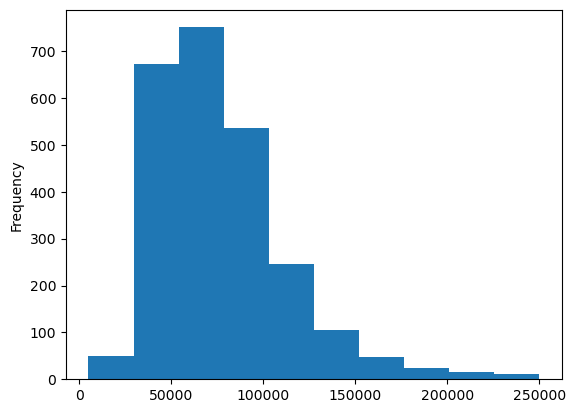

In [17]:
tracts['med_hh_income'].plot.hist(bins = 10)

## visualize the distribution of AMI based on supervisory district

<Axes: xlabel='sup_dist', ylabel='med_hh_income'>

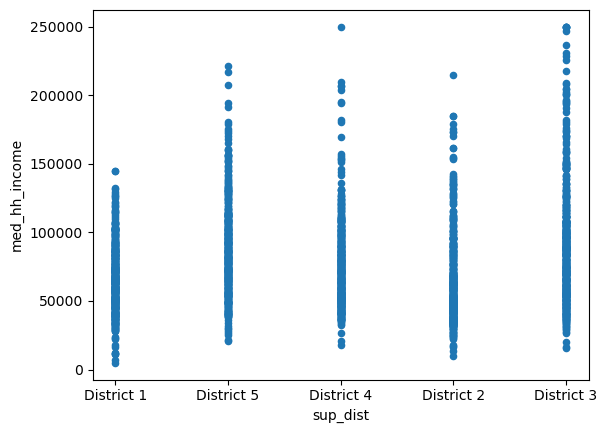

In [18]:
tracts.plot.scatter(x='sup_dist',y='med_hh_income')

## sort AMI from lowest to highest; identify the ten tracts with the lowest AMI

In [21]:
tracts_sorted = tracts.sort_values(by='med_hh_income')

In [22]:
tracts_sorted[['tract','med_hh_income']].head(10)

,tract,med_hh_income
138,06037206303,4918.0
137,06037206302,7193.0
771,06037224702,9722.0
136,06037206301,11153.0
143,06037207304,11430.0
146,06037207307,12283.0
135,06037206202,12344.0
624,06037221820,13630.0
1461,06037265306,15417.0
766,06037224320,16471.0


## produce a horizontal bar chart of the ten lowest AMI tracts in Los Angeles County

<Axes: title={'center': 'Los Angeles County Census Tracts with the Lowest Average Median Income 2020'}, ylabel='tract'>

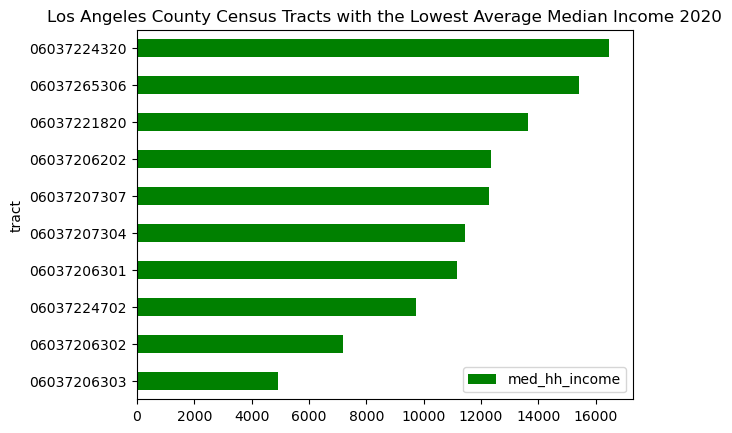

In [30]:
tracts_sorted.head(10).plot.barh(x='tract',
                                y='med_hh_income',
                                title = 'Los Angeles County Census Tracts with the Lowest Average Median Income 2020',
                                color = 'green')

## produce a horizontal bar chart of the ten lowest AMI CSAs in Los Angeles County

<Axes: title={'center': 'Los Angeles County CSA with the Lowest Average Median Income 2020'}, ylabel='csa'>

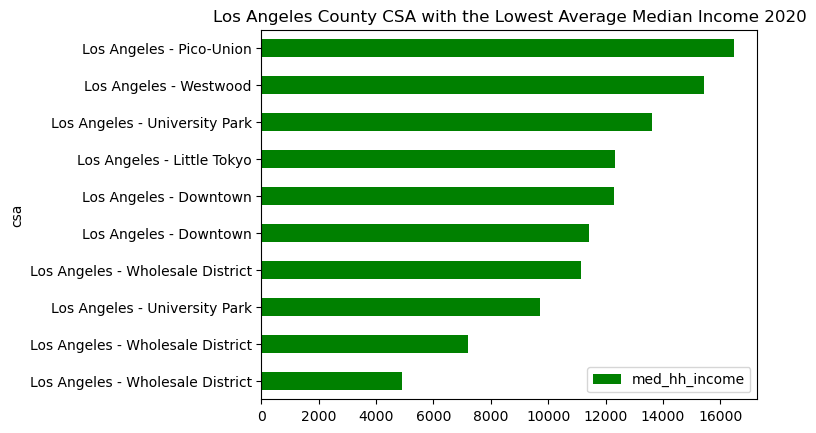

In [31]:
tracts_sorted.head(10).plot.barh(x='csa',
                                y='med_hh_income',
                                title = 'Los Angeles County CSA with the Lowest Average Median Income 2020',
                                color = 'green')

## plot a map of Los Angeles County

<Axes: >

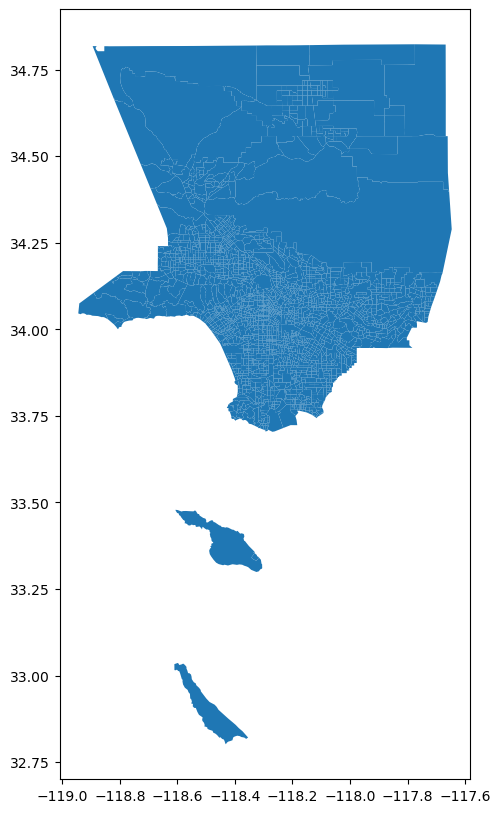

In [32]:
tracts.plot(figsize=(12,10))

## plot a map of AMI across census tracts within Los Angeles County, using Natural Breaks

<Axes: >

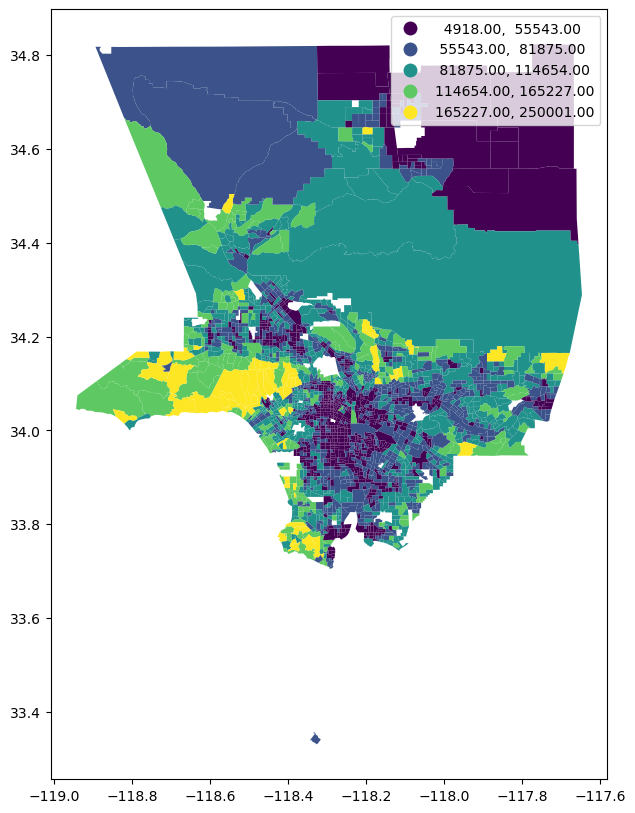

In [36]:
tracts.plot(figsize=(12,10),
                 column='med_hh_income',
                 legend=True, 
                 scheme='NaturalBreaks')

## Assess the geographical changes in distribution of census tract with income variation

<Axes: >

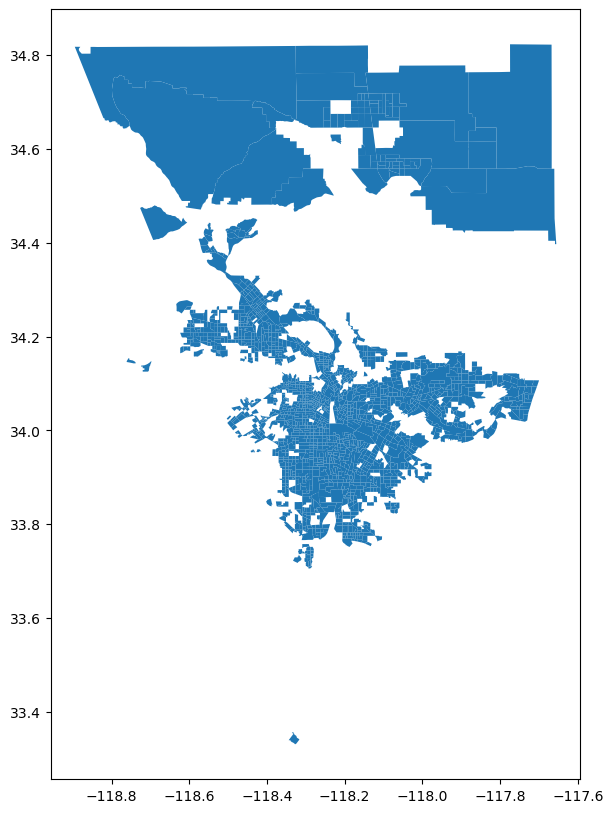

In [40]:
tracts[tracts.below_moderate_income == 'Yes'].plot(figsize=(12,10))

<Axes: >

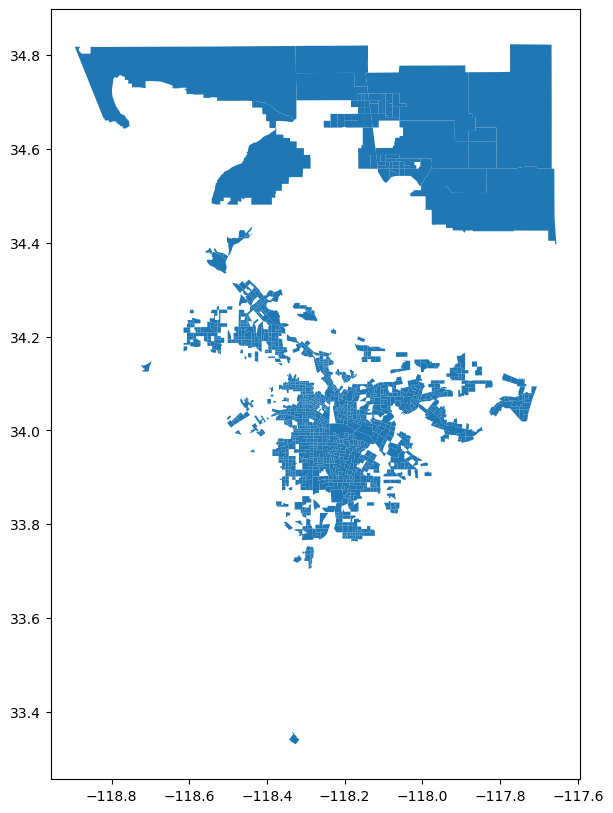

In [39]:
tracts[tracts.below_med_income == 'Yes'].plot(figsize=(12,10))

<Axes: >

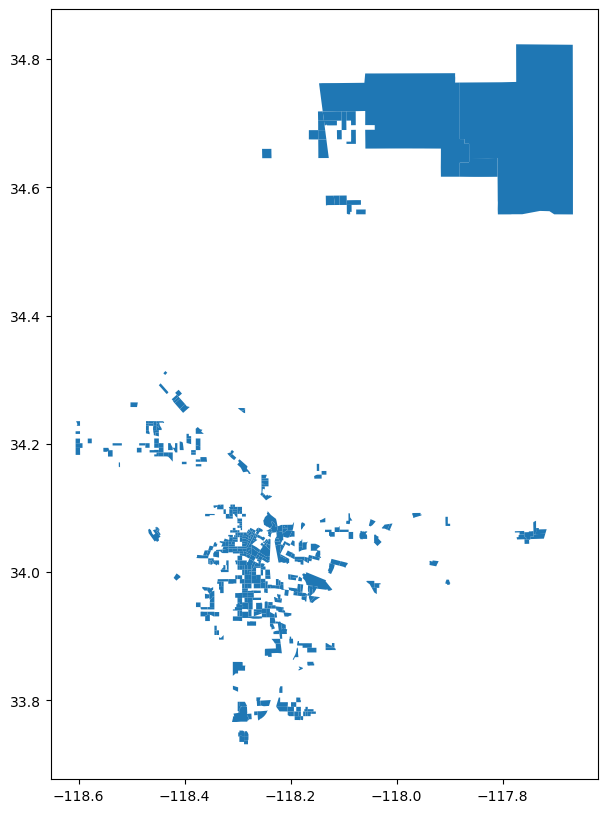

In [41]:
tracts[tracts.below_60pct_med_income == 'Yes'].plot(figsize=(12,10))

## This preliminary mapping exercise ultimately shows that lower-income census tracts, and ultimately households, are pushed to the outter margins of the City and County of Los Angeles. Next, we will also assess commute times and health outcomes to see if there are any correlative trends found.